In [34]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [35]:
# Load image
image_path = '../data/fishing_boat.bmp'
image = Image.open(image_path).convert('L')

# Convert the image to a numpy array
image_array = np.array(image)

In [36]:
# Functions to compute alpha and beta
def alpha(u, P):
    if u == 1:
        return np.sqrt(1/P)
    else:
        return np.sqrt(2/P)

def beta(v, Q):
    if v == 1:
        return np.sqrt(1/Q)
    else:
        return np.sqrt(2/Q)

In [37]:
# Function to compute the basis chip
def basis_chip(u, v, P, Q):
    # Compute alpha and beta
    a_u = alpha(u, P)
    b_v = beta(v, Q)
    
    basis_chip = np.zeros((P, Q))
    x_values = np.arange(1, P + 1)
    y_values = np.arange(1, Q + 1)
    
    u_component = a_u * np.cos(np.pi * (2 * x_values - 1) * (u - 1) / (2 * P))
    v_component = b_v * np.cos(np.pi * (2 * y_values - 1) * (v - 1) / (2 * Q))
    
    for x in range(1, P+1):
        for y in range(1, Q+1):
            basis_chip[x-1, y-1] = a_u * b_v * np.cos(np.pi * (2*x + 1) * (u - 1) / (2 * P)) * np.cos(np.pi * (2*y + 1) * (v - 1) / (2 * Q))
    
   # Plot the basis chip and components in a grid-like layout
    fig = plt.figure(figsize=(8, 6))

    # Top-left: v-component
    ax1 = fig.add_axes([0.05, 0.3, 0.25, 0.6])  # [left, bottom, width, height]
    ax1.plot(v_component, y_values, color='blue')
    ax1.set_xlabel("Intensity")
    ax1.set_ylabel("Sample Index v")
    ax1.invert_yaxis()

    # Center: Basis chip
    ax2 = fig.add_axes([0.35, 0.3, 0.6, 0.6])  # [left, bottom, width, height]
    im = ax2.imshow(basis_chip, cmap='gray', extent=(1, P, 1, Q))
    ax2.set_title(f"T(u={u}, v={v})")
    ax2.invert_yaxis()
    fig.colorbar(im, ax=ax2, orientation='vertical', label="Intensity")

    # Bottom-center: u-component
    ax3 = fig.add_axes([0.35, 0.05, 0.6, 0.2])  # [left, bottom, width, height]
    ax3.plot(x_values, u_component, color='blue')
    ax3.set_xlabel("Sample Index u")
    ax3.set_ylabel("Intensity")

    plt.show()

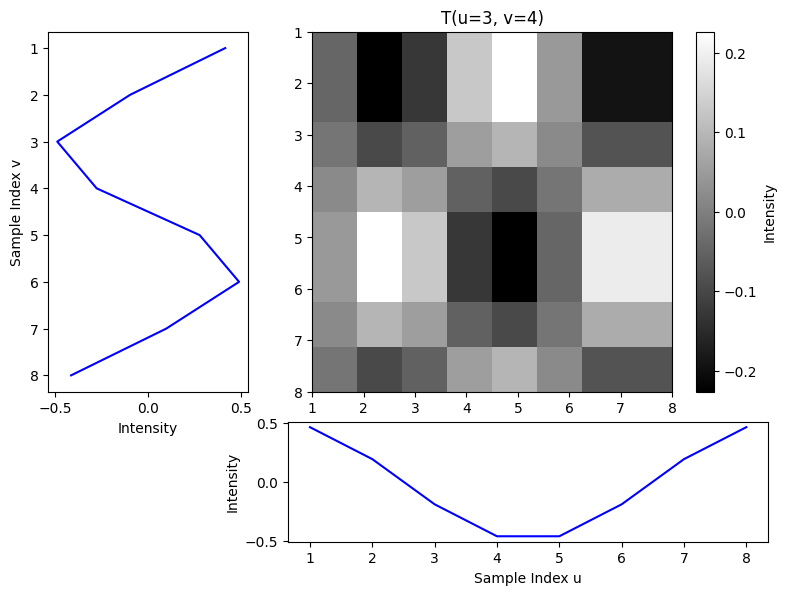

In [38]:
# Define variables for the Basis Chip
P = Q = 8

# Compute the basis chip (u, v) = (3, 4)
chip = basis_chip(3, 4, P, Q)

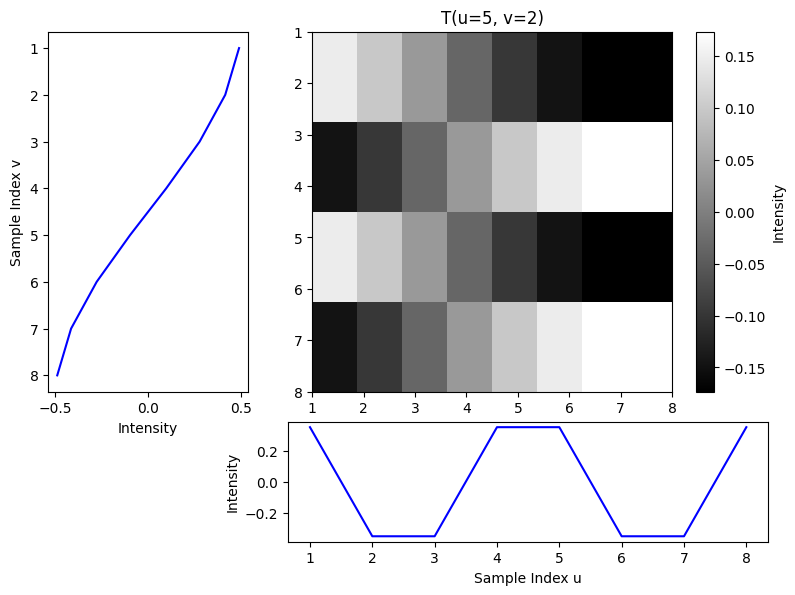

In [39]:
# Compute the basis chip (u, v) = (5, 2)
chip = basis_chip(5, 2, P, Q)